In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import scipy.ndimage as ndimage

In [2]:
model = tf.keras.models.load_model('digit_recoginition.h5')

In [3]:
image_path = r'images\rec\10.jpg'

In [4]:
image = cv2.imread(image_path)

In [5]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

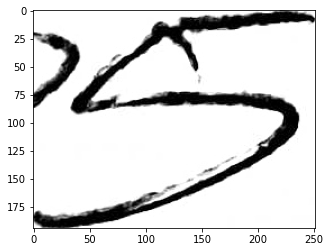

In [6]:
plt.imshow(img_gray, cmap='gray')

In [7]:
gray = cv2.resize(255-img_gray, (28,28))

In [8]:
np.shape(gray)

(28, 28)

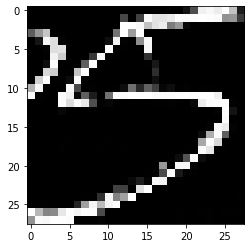

In [9]:
plt.imshow(gray, cmap='gray')

In [10]:
def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)
    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)
    return shiftx,shifty

def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted

In [11]:
while np.sum(gray[0]) == 0:
    gray = gray[1:]

while np.sum(gray[:,0]) == 0:
    gray = np.delete(gray,0,1)

while np.sum(gray[-1]) == 0:
    gray = gray[:-1]

while np.sum(gray[:,-1]) == 0:
    gray = np.delete(gray,-1,1)

rows,cols = gray.shape

In [12]:
if rows > cols:
    factor = 20.0/rows
    rows = 20
    cols = int(round(cols*factor))
    gray = cv2.resize(gray, (cols,rows))
else:
    factor = 20.0/cols
    cols = 20
    rows = int(round(rows*factor))
    gray = cv2.resize(gray, (cols, rows))

In [13]:
colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
gray = np.lib.pad(gray,(rowsPadding,colsPadding),'constant')

In [14]:
shiftx,shifty = getBestShift(gray)
shifted = shift(gray,shiftx,shifty)
gray = shifted

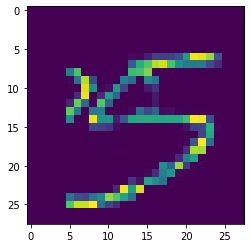

In [15]:
plt.imshow(gray)

In [16]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(gray, (28, 28))
image = image / 255.0
input_image = np.reshape(image, (1, 28, 28))

In [17]:
predicted_labels = model.predict(input_image)
predicted_digit = np.argmax(predicted_labels)
print(f"Predicted Digit: {predicted_digit}")

Predicted Digit: 5


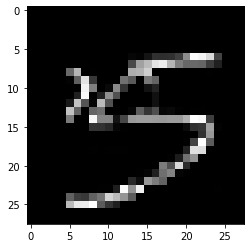

In [18]:
plt.imshow(gray, cmap='gray')